Consider Fashion MNIST dataset available in keras dataset repository.Take this dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.Design ANN model to classify this data set with good accuracy.Explain classification report for he same.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import *
import seaborn as sns
from keras import Sequential
!pip install keras-tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
(Xtrain,ytrain),(Xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
Xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

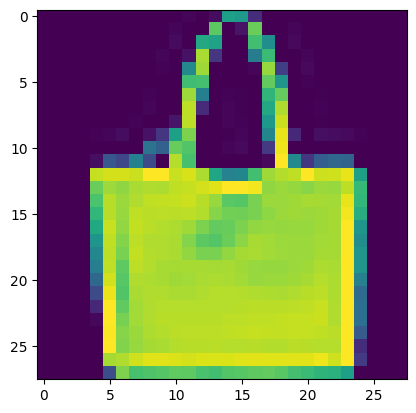

In [ ]:
plt.imshow(Xtrain[454],)

In [ ]:
Xtrain[454]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          8, 144, 138,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
        191,   0,  13, 198,   0,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0, 154,
        147,   0,   0, 178, 125,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  12, 223,
         40,   0,   0, 108, 174,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 120, 219,
          0,   0,   0,   4, 216,  47,   0,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 177, 180,
          0,   0,   0,   0, 194, 133,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
Xtrain = Xtrain/255
Xtest = Xtest/255

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
def build_model(hp):
  model = Sequential([
      keras.layers.Flatten(input_shape = (28,28)),
      keras.layers.Dense(120,activation = "relu")])

  unit = hp.Int("units",8,120,1)
  opti =  hp.Choice("optimizer",values = ['adam','rmsprop','sgd','adadelta','adagrad'])
  active = hp.Choice("activation",values = ["relu","tanh","softmax"])

  for i in range(hp.Int("Layers",min_value=1,max_value = 10)):
    model.add(Dense(units = unit,activation = active))
    model.add(Dropout(.4))

  model.add(Dense(1,activation = "softmax"))
  model.compile(optimizer = opti, loss = "categorical_crossentropy", metrics=["accuracy"])

  return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 8,
    directory = "tuning",
    project_name = "version_1"
)

In [ ]:
tuner.search(Xtrain,ytrain,epochs =20 , validation_data = (Xtest,ytest))

Trial 8 Complete [00h 02m 15s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.10000000149011612
Total elapsed time: 00h 13m 50s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 72, 'optimizer': 'adagrad', 'activation': 'softmax', 'Layers': 4}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 72)                8712      
                                                                 
 dropout (Dropout)           (None, 72)                0         
                                                                 
 dense_2 (Dense)             (None, 72)                5256      
                                                                 
 dropout_1 (Dropout)         (None, 72)                0         
                                                                 
 dense_3 (Dense)             (None, 72)                5

In [ ]:
tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir = '/content/logs',histogram_freq = 1)
model.fit(Xtrain,ytrain,batch_size = 120 ,epochs=50 ,initial_epoch = 15,callbacks=[tb_callbacks] , validation_data=(Xtest,ytest))

Epoch 16/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 17/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 18/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 19/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 20/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 21/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 22/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accura

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir /content/logs/validation

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-06-10 12:01:17.710005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the s